In [1]:
pip install geopandas

     |████████████████████████████████| 962kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 303kB/s 
     |████████████████████████████████| 10.9MB 42.1MB/s 


In [2]:
import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl
import requests
from pandas import DataFrame
import descartes as dsc
import pickle
import os.path

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
fp = "Indian_States.shp"
map_df = gpd.read_file(fp)
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [4]:
res = requests.get("https://www.mygov.in/covid-19")
soup = BeautifulSoup(res.text,"lxml")

In [5]:
data = soup.find_all("tr")
counts = []
dates_list = []
a = data[:100]
for rows in a:
    states = ['Maharashtra', 'Tamil Nadu', 'Delhi','Dadra and Nagar Haveli', 'Gujarat', 'Uttar Pradesh', 'Rajasthan', 'West Bengal', 'Madhya Pradesh', 'Haryana', 'State Unassigned', 'Karnataka', 'Andhra Pradesh', 'Bihar', 'Jammu and Kashmir', 'Assam', 'Odisha', 'Punjab', 'Kerala', 'Uttarakhand', 'Chhattisgarh', 'Jharkhand', 'Tripura', 'Ladakh', 'Goa', 'Himachal Pradesh', 'Manipur', 'Chandigarh', 'Puducherry', 'Nagaland', 'Mizoram', 'Arunachal Pradesh', 'Sikkim', 'Andaman and Nicobar Islands', 'Meghalaya','Telengana']
    for st in states:
        if(rows.text.find(st)>0):
            a = (rows.text.strip())
            #print(a)
            counts.append(a.split("\n"))

In [6]:
df_state = DataFrame(counts, columns = ["States","Total_Cases","Active","Recoveries","Deaths"])
df_state.drop_duplicates()

,States,Total_Cases,Active,Recoveries,Deaths
0,Andhra Pradesh,29168,13428,15412,328
1,Arunachal Pradesh,359,219,138,2
2,Assam,16071,5610,10426,35
3,Bihar,16642,5001,11498,143
4,Chandigarh,559,134,417,8
5,Chhattisgarh,4059,887,3153,19
6,Dadra and Nagar Haveli,479,234,245,0
8,Delhi,112494,19155,89968,3371
9,Goa,2453,952,1487,14
10,Gujarat,41820,10613,29162,2045


In [10]:
map_df['st_nm'].iloc[1]  = 'Arunachal Pradesh'
map_df['st_nm'].iloc[12]  = 'Jammu and Kashmir'
map_df['st_nm'].iloc[29]  = 'Telengana'
map_df['st_nm'].iloc[6]  = 'Dadra and Nagar Haveli'
map_df['st_nm'].iloc[23]  = 'Delhi'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
merged = map_df.set_index('st_nm').join(df_state.set_index('States'))

In [12]:
cases_plot = merged.drop(["Andaman & Nicobar Island","Daman & Diu","Lakshadweep"])

In [13]:
cases_plot.isna().sum()

geometry       0
Total_Cases    0
Active         0
Recoveries     0
Deaths         0
dtype: int64

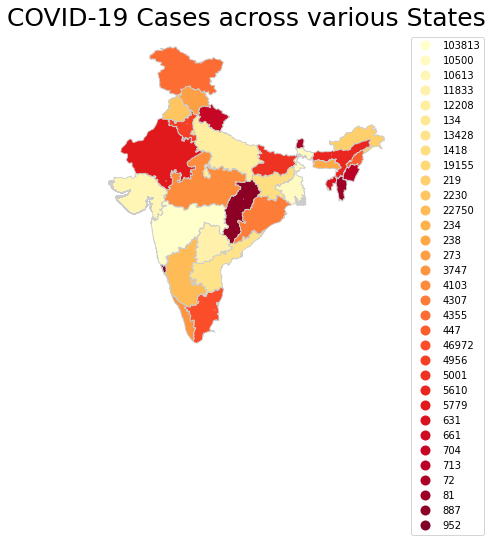

In [14]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('COVID-19 Cases across various States', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
cases_plot.plot(column='Active', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3,1))